In [ ]:
# All required Libraries for processing

%pip install opencv-python tensorflow keras numpy matplotlib albumentations pillow tqdm

In [28]:
# OpenCV: Image ko read, resize, crop, aur process karne ke liye.
# TensorFlow / Keras : Deep Learning me images ko model ke liye normalize aur augment karne ke liye.
# NumPy : Numerical (maths) operations karne ke liye, specially image ke pixel data handle karne me.
# Matplotlib : Images aur graphs ko visualize karne ke liye.
# Albumentations : Advanced aur smart image augmentation ke liye.
# Pillow : Images ko open, convert, aur save karne ke liye (lightweight aur easy).
# tqdm : Loops me progress bar show karne ke liye (user-friendly visualization).

# mostly We have already.

## Dataset Collection

Dataset Folder Structure<br>

Train/<br>
   ├── Damaged_building/<br>
   ├── Damaged_highway/<br>
   ├── debris<br>
   ├── Non-damaged_building/<br>
   └── Non-damaged_highway/<br>
Test/<br>
    ├── Damaged_building/<br>
    ├── Damaged_highway/<br>
    ├── debris/<br>
    ├── Non-damaged_building/<br>
    └── Non-damaged_highway/<br>

    Now We start preprocessing



In [29]:
import os
import cv2
import numpy as np

In [ ]:
# To show progress Bar
from tqdm import tqdm
# for plotting
import matplotlib.pyplot as plt

In [31]:
# Store the input images folders
train_dir = 'Dataset/train'      # this is train images folder
test_dir = 'Dataset/test'        # this is test images folder           

In [33]:
# To create output folder

os.makedirs(output_train_dir, exist_ok=True)
os.makedirs(output_test_dir, exist_ok=True)

In [32]:
#For stored resized images

output_train_dir = 'Processed_Train'  
output_test_dir = 'Processed_Test'

In [ ]:
# Function for resize and normalize image
def preprocess_images(input_folder, output_folder, target_size=(224, 224)):
    for category in os.listdir(input_folder):                 # for each class and folder
        category_path = os.path.join(input_folder, category)
        save_path = os.path.join(output_folder, category)

        os.makedirs(save_path, exist_ok=True)                 # Create the same class folder in the output

        print(f"\n Processing Category: {category}")
        for file_name in tqdm(os.listdir(category_path)):
            file_path = os.path.join(category_path, file_name)
            try:
                # read image 
                img = cv2.imread(file_path)
                if img is None:
                    continue  # If the image is corrupted, then skip it.

                # resize image
                img_resized = cv2.resize(img, target_size)

                # normalize (0-1 range)
                img_normalized = img_resized / 255.0

                # save processed image
                save_file = os.path.join(save_path, file_name)
                cv2.imwrite(save_file, (img_normalized * 255))  # Convert back to 0-255 before saving

            except Exception as e:
                print(f"Error in {file_name}: {e}")


In [35]:
# Function call for both Train & Test data
preprocess_images(train_dir, output_train_dir)
preprocess_images(test_dir, output_test_dir)

print("All images resized and normalized successfully!")



 Processing Category: damaged_buildings


100%|██████████| 448/448 [00:11<00:00, 37.90it/s]



 Processing Category: Damaged_highway


100%|██████████| 720/720 [00:06<00:00, 103.53it/s]



 Processing Category: debris


100%|██████████| 413/413 [00:05<00:00, 71.24it/s] 



 Processing Category: Non-damaged_building


100%|██████████| 1661/1661 [00:15<00:00, 107.64it/s]



 Processing Category: Non-damaged_highway


100%|██████████| 531/531 [00:04<00:00, 111.64it/s]



 Processing Category: Damaged_building


100%|██████████| 100/100 [00:03<00:00, 31.95it/s]



 Processing Category: Damaged_highway


100%|██████████| 100/100 [00:01<00:00, 92.25it/s]



 Processing Category: debris


100%|██████████| 100/100 [00:00<00:00, 112.25it/s]



 Processing Category: Non-damaged_building


100%|██████████| 200/200 [00:01<00:00, 112.62it/s]



 Processing Category: Non-damaged_highway


100%|██████████| 100/100 [00:01<00:00, 96.66it/s]

All images resized and normalized successfully!


In [ ]:
# check folder present in Processed Train and Test folder
os.listdir('Processed_Train')

['damaged_buildings',
 'Damaged_highway',
 'debris',
 'Non-damaged_building',
 'Non-damaged_highway']

In [43]:
os.listdir('Processed_Test')

['Damaged_building',
 'Damaged_highway',
 'debris',
 'Non-damaged_building',
 'Non-damaged_highway']

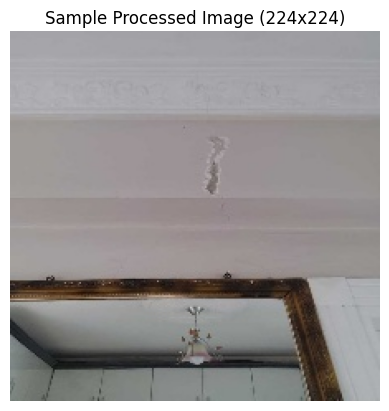

In [44]:
# check a single image for verification in Processed_Train folder

sample_img_path = os.path.join(output_train_dir, 'damaged_buildings', os.listdir(os.path.join(output_train_dir, 'damaged_buildings'))[0])
img = cv2.imread(sample_img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Sample Processed Image (224x224)")
plt.axis('off')
plt.show()


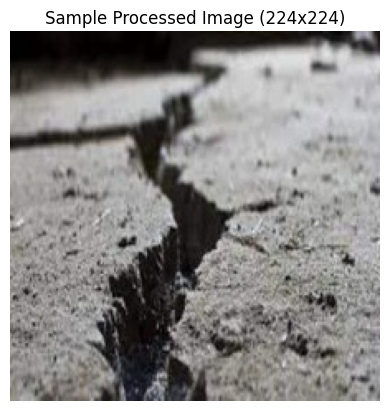

In [45]:
# check a single image for verification in Processed_Test folder

sample_img_path = os.path.join(output_train_dir, 'Damaged_highway', os.listdir(os.path.join(output_train_dir, 'Damaged_highway'))[0])
img = cv2.imread(sample_img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Sample Processed Image (224x224)")
plt.axis('off')
plt.show()


['damaged_buildings',
 'Damaged_highway',
 'debris',
 'Non-damaged_building',
 'Non-damaged_highway']